# Importing dataset using Pandas

In [1]:
import os
os.chdir('E:\DataSet_Ayushi\DiabetesPrediction-master\DiabetesPrediction-master')

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
robust_scaler=RobustScaler()
df=pd.read_csv('diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df["Glucose"].replace(0,np.nan,inplace=True)

In [5]:
df["Age"].replace(0,np.nan,inplace=True)

In [6]:
df["BMI"].replace(0,np.nan,inplace=True)

In [7]:
df["BloodPressure"].replace(0,np.nan,inplace=True)

In [8]:
# Checking if there is any missing values
miss_val=df.isna().sum()
miss_val

Pregnancies                  0
Glucose                      5
BloodPressure               35
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

Since all the values corresponding to the colimns are 0,Therefore there is no missing values

In [9]:
df.dropna(subset=["Glucose"],how="all",inplace=True)
df.dropna(subset=["BMI"],how="all",inplace=True)
df.dropna(subset=["BloodPressure"],how="all",inplace=True)

In [10]:
df.shape

(724, 9)

In [11]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [146]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1
5,5,116.0,74.0,0,0,25.6,0.201,30,0
6,3,78.0,50.0,32,88,31.0,0.248,26,1
8,2,197.0,70.0,45,543,30.5,0.158,53,1
10,4,110.0,92.0,0,0,37.6,0.191,30,0
11,10,168.0,74.0,0,0,38.0,0.537,34,1


# Building Models for Prediction

In [16]:
# Building Logistic Regression Model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
# Creating Training DataSets
X_train1=df.iloc[154:,0:8]
Y_train1=df.iloc[154:,8:9]
X_train2=df.iloc[0:154,0:8].append(df.iloc[308:,0:8])
Y_train2=df.iloc[0:154,8:9].append(df.iloc[308:,8:9])
X_train3=df.iloc[0:308,0:8].append(df.iloc[462:,0:8])
Y_train3=df.iloc[0:308,8:9].append(df.iloc[462:,8:9])
X_train4=df.iloc[0:462,0:8].append(df.iloc[616:,0:8])
Y_train4=df.iloc[0:462,8:9].append(df.iloc[616:,8:9])
X_train5=df.iloc[0:616,0:8]
Y_train5=df.iloc[0:616,8:9]

# Creating Test Dataset
X_test1=df.iloc[0:154,0:8]
Y_test1=df.iloc[0:154,8:9]
X_test2=df.iloc[154:308,0:8]
Y_test2=df.iloc[154:308,8:9]
X_test3=df.iloc[308:462,0:8]
Y_test3=df.iloc[308:462,8:9]
X_test4=df.iloc[462:616,0:8]
Y_test4=df.iloc[462:616,8:9]
X_test5=df.iloc[616:,0:8]
Y_test5=df.iloc[616:,8:9]

#scaling training data
X_train1_sc=robust_scaler.fit_transform(X_train1)
Y_train1_sc=robust_scaler.fit_transform(Y_train1)
X_train2_sc=robust_scaler.fit_transform(X_train2)
Y_train2_sc=robust_scaler.fit_transform(Y_train2)
X_train3_sc=robust_scaler.fit_transform(X_train3)
Y_train3_sc=robust_scaler.fit_transform(Y_train3)
X_train4_sc=robust_scaler.fit_transform(X_train4)
Y_train4_sc=robust_scaler.fit_transform(Y_train4)
X_train5_sc=robust_scaler.fit_transform(X_train5)
Y_train5_sc=robust_scaler.fit_transform(Y_train5)

#scaling test data
X_test1_sc=robust_scaler.fit_transform(X_test1)
Y_test1_sc=robust_scaler.fit_transform(Y_test1)
X_test2_sc=robust_scaler.fit_transform(X_test2)
Y_test2_sc=robust_scaler.fit_transform(Y_test2)
X_test3_sc=robust_scaler.fit_transform(X_test3)
Y_test3_sc=robust_scaler.fit_transform(Y_test3)
X_test4_sc=robust_scaler.fit_transform(X_test4)
Y_test4_sc=robust_scaler.fit_transform(Y_test4)
X_test5_sc=robust_scaler.fit_transform(X_test5)
Y_test5_sc=robust_scaler.fit_transform(Y_test5)


# Training Model with Different Training Data
LR_1=LR.fit(X_train1,Y_train1)
LR_2=LR.fit(X_train2,Y_train2)
LR_3=LR.fit(X_train3,Y_train3)
LR_4=LR.fit(X_train4,Y_train4)
LR_5=LR.fit(X_train5,Y_train5)


# Predicting Values for Test Data
pred_1=LR.predict(X_test1)
pred_2=LR.predict(X_test2)
pred_3=LR.predict(X_test3)
pred_4=LR.predict(X_test4)
pred_5=LR.predict(X_test5)

# Calculating Accuracy Each Test Case and Hence Calculating Overall Accuracy of Model
acc1=accuracy_score(Y_test1,pred_1)
acc2=accuracy_score(Y_test2,pred_2)
acc3=accuracy_score(Y_test3,pred_3)
acc4=accuracy_score(Y_test4,pred_4)
acc5=accuracy_score(Y_test5,pred_5)
print('The accuracy of Logistic Regression is ',(acc1+acc2+acc3+acc4+acc5)/5)

The accuracy of Logistic Regression is  0.7681818181818182


C:\Users\HP\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.

In [17]:
# Applying Support vector Machine Algorithm with Linear Kernel
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
svclassifier=SVC(kernel='linear')
# Creating Training DataSets
X_train1=df.iloc[154:,0:8]
Y_train1=df.iloc[154:,8:9]
X_train2=df.iloc[0:154,0:8].append(df.iloc[308:,0:8])
Y_train2=df.iloc[0:154,8:9].append(df.iloc[308:,8:9])
X_train3=df.iloc[0:308,0:8].append(df.iloc[462:,0:8])
Y_train3=df.iloc[0:308,8:9].append(df.iloc[462:,8:9])
X_train4=df.iloc[0:462,0:8].append(df.iloc[616:,0:8])
Y_train4=df.iloc[0:462,8:9].append(df.iloc[616:,8:9])
X_train5=df.iloc[0:616,0:8]
Y_train5=df.iloc[0:616,8:9]

# Creating Test Dataset
X_test1=df.iloc[0:154,0:8]
Y_test1=df.iloc[0:154,8:9]
X_test2=df.iloc[154:308,0:8]
Y_test2=df.iloc[154:308,8:9]
X_test3=df.iloc[308:462,0:8]
Y_test3=df.iloc[308:462,8:9]
X_test4=df.iloc[462:616,0:8]
Y_test4=df.iloc[462:616,8:9]
X_test5=df.iloc[616:,0:8]
Y_test5=df.iloc[616:,8:9]

#scaling training data
X_train1_sc=robust_scaler.fit_transform(X_train1)
Y_train1_sc=robust_scaler.fit_transform(Y_train1)
X_train2_sc=robust_scaler.fit_transform(X_train2)
Y_train2_sc=robust_scaler.fit_transform(Y_train2)
X_train3_sc=robust_scaler.fit_transform(X_train3)
Y_train3_sc=robust_scaler.fit_transform(Y_train3)
X_train4_sc=robust_scaler.fit_transform(X_train4)
Y_train4_sc=robust_scaler.fit_transform(Y_train4)
X_train5_sc=robust_scaler.fit_transform(X_train5)
Y_train5_sc=robust_scaler.fit_transform(Y_train5)

#scaling test data
X_test1_sc=robust_scaler.fit_transform(X_test1)
Y_test1_sc=robust_scaler.fit_transform(Y_test1)
X_test2_sc=robust_scaler.fit_transform(X_test2)
Y_test2_sc=robust_scaler.fit_transform(Y_test2)
X_test3_sc=robust_scaler.fit_transform(X_test3)
Y_test3_sc=robust_scaler.fit_transform(Y_test3)
X_test4_sc=robust_scaler.fit_transform(X_test4)
Y_test4_sc=robust_scaler.fit_transform(Y_test4)
X_test5_sc=robust_scaler.fit_transform(X_test5)
Y_test5_sc=robust_scaler.fit_transform(Y_test5)


# Training Model with Different Training Data
SV_1=svclassifier.fit(X_train1,Y_train1)
SV_2=svclassifier.fit(X_train2,Y_train2)
SV_3=svclassifier.fit(X_train3,Y_train3)
SV_4=svclassifier.fit(X_train4,Y_train4)
SV_5=svclassifier.fit(X_train5,Y_train5)


# Predicting Values for Test Data
pred_1=SV_1.predict(X_test1)
pred_2=SV_2.predict(X_test2)
pred_3=SV_3.predict(X_test3)
pred_4=SV_4.predict(X_test4)
pred_5=SV_5.predict(X_test5)


# Calculating Accuracy Each Test Case and Hence Calculating Overall Accuracy of Model
acc1=accuracy_score(Y_test1,pred_1)
acc2=accuracy_score(Y_test2,pred_2)
acc3=accuracy_score(Y_test3,pred_3)
acc4=accuracy_score(Y_test4,pred_4)
acc5=accuracy_score(Y_test5,pred_5)

print('The accuracy of Linear SVM  is ',(acc1+acc2+acc3+acc4+acc5)/5)

C:\Users\HP\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

The accuracy of Linear SVM  is  0.7733766233766233


In [166]:
# Applying Support vector Machine Algorithm with Gaussian Kernel
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
svclassifier=SVC(kernel='rbf')
# Creating Training DataSets
X_train1=df.iloc[154:,0:8]
Y_train1=df.iloc[154:,8:9]
X_train2=df.iloc[0:154,0:8].append(df.iloc[308:,0:8])
Y_train2=df.iloc[0:154,8:9].append(df.iloc[308:,8:9])
X_train3=df.iloc[0:308,0:8].append(df.iloc[462:,0:8])
Y_train3=df.iloc[0:308,8:9].append(df.iloc[462:,8:9])
X_train4=df.iloc[0:462,0:8].append(df.iloc[616:,0:8])
Y_train4=df.iloc[0:462,8:9].append(df.iloc[616:,8:9])
X_train5=df.iloc[0:616,0:8]
Y_train5=df.iloc[0:616,8:9]

# Creating Test Dataset
X_test1=df.iloc[0:154,0:8]
Y_test1=df.iloc[0:154,8:9]
X_test2=df.iloc[154:308,0:8]
Y_test2=df.iloc[154:308,8:9]
X_test3=df.iloc[308:462,0:8]
Y_test3=df.iloc[308:462,8:9]
X_test4=df.iloc[462:616,0:8]
Y_test4=df.iloc[462:616,8:9]
X_test5=df.iloc[616:,0:8]
Y_test5=df.iloc[616:,8:9]

#scaling training data
X_train1_sc=robust_scaler.fit_transform(X_train1)
Y_train1_sc=robust_scaler.fit_transform(Y_train1)
X_train2_sc=robust_scaler.fit_transform(X_train2)
Y_train2_sc=robust_scaler.fit_transform(Y_train2)
X_train3_sc=robust_scaler.fit_transform(X_train3)
Y_train3_sc=robust_scaler.fit_transform(Y_train3)
X_train4_sc=robust_scaler.fit_transform(X_train4)
Y_train4_sc=robust_scaler.fit_transform(Y_train4)
X_train5_sc=robust_scaler.fit_transform(X_train5)
Y_train5_sc=robust_scaler.fit_transform(Y_train5)

#scaling test data
X_test1_sc=robust_scaler.fit_transform(X_test1)
Y_test1_sc=robust_scaler.fit_transform(Y_test1)
X_test2_sc=robust_scaler.fit_transform(X_test2)
Y_test2_sc=robust_scaler.fit_transform(Y_test2)
X_test3_sc=robust_scaler.fit_transform(X_test3)
Y_test3_sc=robust_scaler.fit_transform(Y_test3)
X_test4_sc=robust_scaler.fit_transform(X_test4)
Y_test4_sc=robust_scaler.fit_transform(Y_test4)
X_test5_sc=robust_scaler.fit_transform(X_test5)
Y_test5_sc=robust_scaler.fit_transform(Y_test5)


# Training Model with Different Training Data
SV_1=svclassifier.fit(X_train1,Y_train1)
SV_2=svclassifier.fit(X_train2,Y_train2)
SV_3=svclassifier.fit(X_train3,Y_train3)
SV_4=svclassifier.fit(X_train4,Y_train4)
SV_5=svclassifier.fit(X_train5,Y_train5)


# Predicting Values for Test Data
pred_1=SV_1.predict(X_test1)
pred_2=SV_2.predict(X_test2)
pred_3=SV_3.predict(X_test3)
pred_4=SV_4.predict(X_test4)
pred_5=SV_5.predict(X_test5)


# Calculating Accuracy Each Test Case and Hence Calculating Overall Accuracy of Model
acc1=accuracy_score(Y_test1,pred_1)
acc2=accuracy_score(Y_test2,pred_2)
acc3=accuracy_score(Y_test3,pred_3)
acc4=accuracy_score(Y_test4,pred_4)
acc5=accuracy_score(Y_test5,pred_5)

print('The accuracy of Gaussian SVM is ',(acc1+acc2+acc3+acc4+acc5)/5)

C:\Users\HP\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\HP\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account bet

The accuracy of Gaussian SVM is  0.9289473684210525


In [167]:
# Applying Support vector Machine Algorithm with Sigmoidal Kernel
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
svclassifier=SVC(kernel='sigmoid')
# Creating Training DataSets
X_train1=df.iloc[154:,0:8]
Y_train1=df.iloc[154:,8:9]
X_train2=df.iloc[0:154,0:8].append(df.iloc[308:,0:8])
Y_train2=df.iloc[0:154,8:9].append(df.iloc[308:,8:9])
X_train3=df.iloc[0:308,0:8].append(df.iloc[462:,0:8])
Y_train3=df.iloc[0:308,8:9].append(df.iloc[462:,8:9])
X_train4=df.iloc[0:462,0:8].append(df.iloc[616:,0:8])
Y_train4=df.iloc[0:462,8:9].append(df.iloc[616:,8:9])
X_train5=df.iloc[0:616,0:8]
Y_train5=df.iloc[0:616,8:9]

# Creating Test Dataset
X_test1=df.iloc[0:154,0:8]
Y_test1=df.iloc[0:154,8:9]
X_test2=df.iloc[154:308,0:8]
Y_test2=df.iloc[154:308,8:9]
X_test3=df.iloc[308:462,0:8]
Y_test3=df.iloc[308:462,8:9]
X_test4=df.iloc[462:616,0:8]
Y_test4=df.iloc[462:616,8:9]
X_test5=df.iloc[616:,0:8]
Y_test5=df.iloc[616:,8:9]

#scaling training data
X_train1_sc=robust_scaler.fit_transform(X_train1)
Y_train1_sc=robust_scaler.fit_transform(Y_train1)
X_train2_sc=robust_scaler.fit_transform(X_train2)
Y_train2_sc=robust_scaler.fit_transform(Y_train2)
X_train3_sc=robust_scaler.fit_transform(X_train3)
Y_train3_sc=robust_scaler.fit_transform(Y_train3)
X_train4_sc=robust_scaler.fit_transform(X_train4)
Y_train4_sc=robust_scaler.fit_transform(Y_train4)
X_train5_sc=robust_scaler.fit_transform(X_train5)
Y_train5_sc=robust_scaler.fit_transform(Y_train5)

#scaling test data
X_test1_sc=robust_scaler.fit_transform(X_test1)
Y_test1_sc=robust_scaler.fit_transform(Y_test1)
X_test2_sc=robust_scaler.fit_transform(X_test2)
Y_test2_sc=robust_scaler.fit_transform(Y_test2)
X_test3_sc=robust_scaler.fit_transform(X_test3)
Y_test3_sc=robust_scaler.fit_transform(Y_test3)
X_test4_sc=robust_scaler.fit_transform(X_test4)
Y_test4_sc=robust_scaler.fit_transform(Y_test4)
X_test5_sc=robust_scaler.fit_transform(X_test5)
Y_test5_sc=robust_scaler.fit_transform(Y_test5)


# Training Model with Different Training Data
SV_1=svclassifier.fit(X_train1,Y_train1)
SV_2=svclassifier.fit(X_train2,Y_train2)
SV_3=svclassifier.fit(X_train3,Y_train3)
SV_4=svclassifier.fit(X_train4,Y_train4)
SV_5=svclassifier.fit(X_train5,Y_train5)


# Predicting Values for Test Data
pred_1=SV_1.predict(X_test1)
pred_2=SV_2.predict(X_test2)
pred_3=SV_3.predict(X_test3)
pred_4=SV_4.predict(X_test4)
pred_5=SV_5.predict(X_test5)


# Calculating Accuracy Each Test Case and Hence Calculating Overall Accuracy of Model
acc1=accuracy_score(Y_test1,pred_1)
acc2=accuracy_score(Y_test2,pred_2)
acc3=accuracy_score(Y_test3,pred_3)
acc4=accuracy_score(Y_test4,pred_4)
acc5=accuracy_score(Y_test5,pred_5)

print('The accuracy of Sigmoid SVM is ',(acc1+acc2+acc3+acc4+acc5)/5)

The accuracy of Sigmoid SVM is  0.6510252904989747


C:\Users\HP\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\HP\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account bet

In [168]:
# Applying Decission Tree Algorithm 
from sklearn.metrics import accuracy_score
from sklearn import tree
Tree=tree.DecisionTreeClassifier()
# Creating Training DataSets
X_train1=df.iloc[154:,0:8]
Y_train1=df.iloc[154:,8:9]
X_train2=df.iloc[0:154,0:8].append(df.iloc[308:,0:8])
Y_train2=df.iloc[0:154,8:9].append(df.iloc[308:,8:9])
X_train3=df.iloc[0:308,0:8].append(df.iloc[462:,0:8])
Y_train3=df.iloc[0:308,8:9].append(df.iloc[462:,8:9])
X_train4=df.iloc[0:462,0:8].append(df.iloc[616:,0:8])
Y_train4=df.iloc[0:462,8:9].append(df.iloc[616:,8:9])
X_train5=df.iloc[0:616,0:8]
Y_train5=df.iloc[0:616,8:9]

# Creating Test Dataset
X_test1=df.iloc[0:154,0:8]
Y_test1=df.iloc[0:154,8:9]
X_test2=df.iloc[154:308,0:8]
Y_test2=df.iloc[154:308,8:9]
X_test3=df.iloc[308:462,0:8]
Y_test3=df.iloc[308:462,8:9]
X_test4=df.iloc[462:616,0:8]
Y_test4=df.iloc[462:616,8:9]
X_test5=df.iloc[616:,0:8]
Y_test5=df.iloc[616:,8:9]

#scaling training data
X_train1_sc=robust_scaler.fit_transform(X_train1)
Y_train1_sc=robust_scaler.fit_transform(Y_train1)
X_train2_sc=robust_scaler.fit_transform(X_train2)
Y_train2_sc=robust_scaler.fit_transform(Y_train2)
X_train3_sc=robust_scaler.fit_transform(X_train3)
Y_train3_sc=robust_scaler.fit_transform(Y_train3)
X_train4_sc=robust_scaler.fit_transform(X_train4)
Y_train4_sc=robust_scaler.fit_transform(Y_train4)
X_train5_sc=robust_scaler.fit_transform(X_train5)
Y_train5_sc=robust_scaler.fit_transform(Y_train5)

#scaling test data
X_test1_sc=robust_scaler.fit_transform(X_test1)
Y_test1_sc=robust_scaler.fit_transform(Y_test1)
X_test2_sc=robust_scaler.fit_transform(X_test2)
Y_test2_sc=robust_scaler.fit_transform(Y_test2)
X_test3_sc=robust_scaler.fit_transform(X_test3)
Y_test3_sc=robust_scaler.fit_transform(Y_test3)
X_test4_sc=robust_scaler.fit_transform(X_test4)
Y_test4_sc=robust_scaler.fit_transform(Y_test4)
X_test5_sc=robust_scaler.fit_transform(X_test5)
Y_test5_sc=robust_scaler.fit_transform(Y_test5)

# Training Model with Different Training Data
T_1=Tree.fit(X_train1,Y_train1)
T_2=Tree.fit(X_train2,Y_train2)
T_3=Tree.fit(X_train3,Y_train3)
T_4=Tree.fit(X_train4,Y_train4)
T_5=Tree.fit(X_train5,Y_train5)


# Predicting Values for Test Data
pred_1=T_1.predict(X_test1)
pred_2=T_2.predict(X_test2)
pred_3=T_3.predict(X_test3)
pred_4=T_4.predict(X_test4)
pred_5=T_5.predict(X_test5)


# Calculating Accuracy Each Test Case and Hence Calculating Overall Accuracy of Model
acc1=accuracy_score(Y_test1,pred_1)
acc2=accuracy_score(Y_test2,pred_2)
acc3=accuracy_score(Y_test3,pred_3)
acc4=accuracy_score(Y_test4,pred_4)
acc5=accuracy_score(Y_test5,pred_5)

print('The accuracy of Decision Tree is ',(acc1+acc2+acc3+acc4+acc5)/5)

The accuracy of Decision Tree is  0.9434210526315789


C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

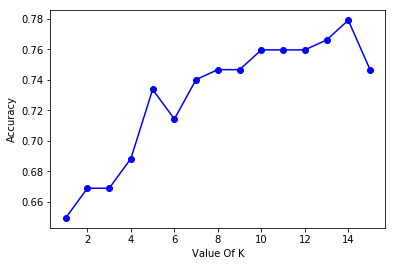

In [153]:
# Plotting Grpah for different Accuracy values to find best value pf K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train1=df.iloc[154:,0:8]
Y_train1=df.iloc[154:,8:9]
X_test1=df.iloc[0:154,0:8]
Y_test1=df.iloc[0:154,8:9]
List=[]
for k in range(1,16):
    Knn=KNeighborsClassifier(n_neighbors=k)
    Knn.fit(X_train1,Y_train1)
    pre=Knn.predict(X_test1)
    acc=accuracy_score(Y_test1,pre)
    List.append(acc)
    acc=0
import matplotlib.pyplot as plt
plt.plot(range(1,16),List,'bo-')
plt.xlabel('Value Of K')
plt.ylabel("Accuracy")
plt.show()
        

 From the graph it is clear that maximum accuracy is given by k=13 and k=14. Therefore, we can take any of two value for Model Building

In [169]:
# Applying KNN Algorithm with K=13
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=13)

# Creating Training Datasets
X_train1=df.iloc[154:,0:8]
Y_train1=df.iloc[154:,8:9]
X_train2=df.iloc[0:154,0:8].append(df.iloc[308:,0:8])
Y_train2=df.iloc[0:154,8:9].append(df.iloc[308:,8:9])
X_train3=df.iloc[0:308,0:8].append(df.iloc[462:,0:8])
Y_train3=df.iloc[0:308,8:9].append(df.iloc[462:,8:9])
X_train4=df.iloc[0:462,0:8].append(df.iloc[616:,0:8])
Y_train4=df.iloc[0:462,8:9].append(df.iloc[616:,8:9])
X_train5=df.iloc[0:616,0:8]
Y_train5=df.iloc[0:616,8:9]

# Creating Test Dataset
X_test1=df.iloc[0:154,0:8]
Y_test1=df.iloc[0:154,8:9]
X_test2=df.iloc[154:308,0:8]
Y_test2=df.iloc[154:308,8:9]
X_test3=df.iloc[308:462,0:8]
Y_test3=df.iloc[308:462,8:9]
X_test4=df.iloc[462:616,0:8]
Y_test4=df.iloc[462:616,8:9]
X_test5=df.iloc[616:,0:8]
Y_test5=df.iloc[616:,8:9]

#scaling training data
X_train1_sc=robust_scaler.fit_transform(X_train1)
Y_train1_sc=robust_scaler.fit_transform(Y_train1)
X_train2_sc=robust_scaler.fit_transform(X_train2)
Y_train2_sc=robust_scaler.fit_transform(Y_train2)
X_train3_sc=robust_scaler.fit_transform(X_train3)
Y_train3_sc=robust_scaler.fit_transform(Y_train3)
X_train4_sc=robust_scaler.fit_transform(X_train4)
Y_train4_sc=robust_scaler.fit_transform(Y_train4)
X_train5_sc=robust_scaler.fit_transform(X_train5)
Y_train5_sc=robust_scaler.fit_transform(Y_train5)

#scaling test data
X_test1_sc=robust_scaler.fit_transform(X_test1)
Y_test1_sc=robust_scaler.fit_transform(Y_test1)
X_test2_sc=robust_scaler.fit_transform(X_test2)
Y_test2_sc=robust_scaler.fit_transform(Y_test2)
X_test3_sc=robust_scaler.fit_transform(X_test3)
Y_test3_sc=robust_scaler.fit_transform(Y_test3)
X_test4_sc=robust_scaler.fit_transform(X_test4)
Y_test4_sc=robust_scaler.fit_transform(Y_test4)
X_test5_sc=robust_scaler.fit_transform(X_test5)
Y_test5_sc=robust_scaler.fit_transform(Y_test5)

# Training Model with Different Training Data
Knn_1=Knn.fit(X_train1,Y_train1)
Knn_2=Knn.fit(X_train2,Y_train2)
Knn_3=Knn.fit(X_train3,Y_train3)
Knn_4=Knn.fit(X_train4,Y_train4)
Knn_5=Knn.fit(X_train5,Y_train5)


# Predicting Values for Test Data
pred_1=Knn_1.predict(X_test1)
pred_2=Knn_2.predict(X_test2)
pred_3=Knn_3.predict(X_test3)
pred_4=Knn_4.predict(X_test4)
pred_5=Knn_5.predict(X_test5)


# Calculating Accuracy Each Test Case and Hence Calculating Overall Accuracy of Model
acc1=accuracy_score(Y_test1,pred_1)
acc2=accuracy_score(Y_test2,pred_2)
acc3=accuracy_score(Y_test3,pred_3)
acc4=accuracy_score(Y_test4,pred_4)
acc5=accuracy_score(Y_test5,pred_5)

print('The accuracy of KNN is ',(acc1+acc2+acc3+acc4+acc5)/5)


The accuracy of KNN is  0.7758885850991114


C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:55: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:57: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:58: DataConversionWarning: A column-vector y was p

In [170]:
# Applying KNN Algorithm with K=14
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=14)

# Creating Training Datasets
X_train1=df.iloc[154:,0:8]
Y_train1=df.iloc[154:,8:9]
X_train2=df.iloc[0:154,0:8].append(df.iloc[308:,0:8])
Y_train2=df.iloc[0:154,8:9].append(df.iloc[308:,8:9])
X_train3=df.iloc[0:308,0:8].append(df.iloc[462:,0:8])
Y_train3=df.iloc[0:308,8:9].append(df.iloc[462:,8:9])
X_train4=df.iloc[0:462,0:8].append(df.iloc[616:,0:8])
Y_train4=df.iloc[0:462,8:9].append(df.iloc[616:,8:9])
X_train5=df.iloc[0:616,0:8]
Y_train5=df.iloc[0:616,8:9]

# Creating Test Dataset
X_test1=df.iloc[0:154,0:8]
Y_test1=df.iloc[0:154,8:9]
X_test2=df.iloc[154:308,0:8]
Y_test2=df.iloc[154:308,8:9]
X_test3=df.iloc[308:462,0:8]
Y_test3=df.iloc[308:462,8:9]
X_test4=df.iloc[462:616,0:8]
Y_test4=df.iloc[462:616,8:9]
X_test5=df.iloc[616:,0:8]
Y_test5=df.iloc[616:,8:9]

#scaling training data
X_train1_sc=robust_scaler.fit_transform(X_train1)
Y_train1_sc=robust_scaler.fit_transform(Y_train1)
X_train2_sc=robust_scaler.fit_transform(X_train2)
Y_train2_sc=robust_scaler.fit_transform(Y_train2)
X_train3_sc=robust_scaler.fit_transform(X_train3)
Y_train3_sc=robust_scaler.fit_transform(Y_train3)
X_train4_sc=robust_scaler.fit_transform(X_train4)
Y_train4_sc=robust_scaler.fit_transform(Y_train4)
X_train5_sc=robust_scaler.fit_transform(X_train5)
Y_train5_sc=robust_scaler.fit_transform(Y_train5)

#scaling test data
X_test1_sc=robust_scaler.fit_transform(X_test1)
Y_test1_sc=robust_scaler.fit_transform(Y_test1)
X_test2_sc=robust_scaler.fit_transform(X_test2)
Y_test2_sc=robust_scaler.fit_transform(Y_test2)
X_test3_sc=robust_scaler.fit_transform(X_test3)
Y_test3_sc=robust_scaler.fit_transform(Y_test3)
X_test4_sc=robust_scaler.fit_transform(X_test4)
Y_test4_sc=robust_scaler.fit_transform(Y_test4)
X_test5_sc=robust_scaler.fit_transform(X_test5)
Y_test5_sc=robust_scaler.fit_transform(Y_test5)

# Training Model with Different Training Data
Knn_1=Knn.fit(X_train1,Y_train1)
Knn_2=Knn.fit(X_train2,Y_train2)
Knn_3=Knn.fit(X_train3,Y_train3)
Knn_4=Knn.fit(X_train4,Y_train4)
Knn_5=Knn.fit(X_train5,Y_train5)


# Predicting Values for Test Data
pred_1=Knn_1.predict(X_test1)
pred_2=Knn_2.predict(X_test2)
pred_3=Knn_3.predict(X_test3)
pred_4=Knn_4.predict(X_test4)
pred_5=Knn_5.predict(X_test5)


# Calculating Accuracy Each Test Case and Hence Calculating Overall Accuracy of Model
acc1=accuracy_score(Y_test1,pred_1)
acc2=accuracy_score(Y_test2,pred_2)
acc3=accuracy_score(Y_test3,pred_3)
acc4=accuracy_score(Y_test4,pred_4)
acc5=accuracy_score(Y_test5,pred_5)

print('The accuracy of KNN is ',(acc1+acc2+acc3+acc4+acc5)/5)


The accuracy of KNN is  0.7694121667805878


C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:55: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:57: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:58: DataConversionWarning: A column-vector y was p

In [171]:
# Applying Naive Bayes 'Gaussian' Algorithm 
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

# Creating Training Datasets
X_train1=df.iloc[154:,0:8]
Y_train1=df.iloc[154:,8:9]
X_train2=df.iloc[0:154,0:8].append(df.iloc[308:,0:8])
Y_train2=df.iloc[0:154,8:9].append(df.iloc[308:,8:9])
X_train3=df.iloc[0:308,0:8].append(df.iloc[462:,0:8])
Y_train3=df.iloc[0:308,8:9].append(df.iloc[462:,8:9])
X_train4=df.iloc[0:462,0:8].append(df.iloc[616:,0:8])
Y_train4=df.iloc[0:462,8:9].append(df.iloc[616:,8:9])
X_train5=df.iloc[0:616,0:8]
Y_train5=df.iloc[0:616,8:9]

# Creating Test Dataset
X_test1=df.iloc[0:154,0:8]
Y_test1=df.iloc[0:154,8:9]
X_test2=df.iloc[154:308,0:8]
Y_test2=df.iloc[154:308,8:9]
X_test3=df.iloc[308:462,0:8]
Y_test3=df.iloc[308:462,8:9]
X_test4=df.iloc[462:616,0:8]
Y_test4=df.iloc[462:616,8:9]
X_test5=df.iloc[616:,0:8]
Y_test5=df.iloc[616:,8:9]

#scaling training data
X_train1_sc=robust_scaler.fit_transform(X_train1)
Y_train1_sc=robust_scaler.fit_transform(Y_train1)
X_train2_sc=robust_scaler.fit_transform(X_train2)
Y_train2_sc=robust_scaler.fit_transform(Y_train2)
X_train3_sc=robust_scaler.fit_transform(X_train3)
Y_train3_sc=robust_scaler.fit_transform(Y_train3)
X_train4_sc=robust_scaler.fit_transform(X_train4)
Y_train4_sc=robust_scaler.fit_transform(Y_train4)
X_train5_sc=robust_scaler.fit_transform(X_train5)
Y_train5_sc=robust_scaler.fit_transform(Y_train5)

#scaling test data
X_test1_sc=robust_scaler.fit_transform(X_test1)
Y_test1_sc=robust_scaler.fit_transform(Y_test1)
X_test2_sc=robust_scaler.fit_transform(X_test2)
Y_test2_sc=robust_scaler.fit_transform(Y_test2)
X_test3_sc=robust_scaler.fit_transform(X_test3)
Y_test3_sc=robust_scaler.fit_transform(Y_test3)
X_test4_sc=robust_scaler.fit_transform(X_test4)
Y_test4_sc=robust_scaler.fit_transform(Y_test4)
X_test5_sc=robust_scaler.fit_transform(X_test5)
Y_test5_sc=robust_scaler.fit_transform(Y_test5)


# Training Model with Different Training Data
gnb_1=gnb.fit(X_train1,Y_train1)
gnb_2=gnb.fit(X_train2,Y_train2)
gnb_3=gnb.fit(X_train3,Y_train3)
gnb_4=gnb.fit(X_train4,Y_train4)
gnb_5=gnb.fit(X_train5,Y_train5)


# Predicting Values for Test Data
pred_1=gnb_1.predict(X_test1)
pred_2=gnb_2.predict(X_test2)
pred_3=gnb_3.predict(X_test3)
pred_4=gnb_4.predict(X_test4)
pred_5=gnb_5.predict(X_test5)


# Calculating Accuracy Each Test Case and Hence Calculating Overall Accuracy of Model
acc1=accuracy_score(Y_test1,pred_1)
acc2=accuracy_score(Y_test2,pred_2)
acc3=accuracy_score(Y_test3,pred_3)
acc4=accuracy_score(Y_test4,pred_4)
acc5=accuracy_score(Y_test5,pred_5)

print('The accuracy of Naive Bayes is ',(acc1+acc2+acc3+acc4+acc5)/5)



The accuracy of Naive Bayes is  0.76296992481203


C:\Users\HP\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [172]:
# Applying Random Forest Algorithm 
from sklearn.ensemble import RandomForestClassifier
Rnf=RandomForestClassifier()

# Creating Training Datasets
X_train1=df.iloc[154:,0:8]
Y_train1=df.iloc[154:,8:9]
X_train2=df.iloc[0:154,0:8].append(df.iloc[308:,0:8])
Y_train2=df.iloc[0:154,8:9].append(df.iloc[308:,8:9])
X_train3=df.iloc[0:308,0:8].append(df.iloc[462:,0:8])
Y_train3=df.iloc[0:308,8:9].append(df.iloc[462:,8:9])
X_train4=df.iloc[0:462,0:8].append(df.iloc[616:,0:8])
Y_train4=df.iloc[0:462,8:9].append(df.iloc[616:,8:9])
X_train5=df.iloc[0:616,0:8]
Y_train5=df.iloc[0:616,8:9]

# Creating Test Dataset
X_test1=df.iloc[0:154,0:8]
Y_test1=df.iloc[0:154,8:9]
X_test2=df.iloc[154:308,0:8]
Y_test2=df.iloc[154:308,8:9]
X_test3=df.iloc[308:462,0:8]
Y_test3=df.iloc[308:462,8:9]
X_test4=df.iloc[462:616,0:8]
Y_test4=df.iloc[462:616,8:9]
X_test5=df.iloc[616:,0:8]
Y_test5=df.iloc[616:,8:9]

#scaling training data
X_train1_sc=robust_scaler.fit_transform(X_train1)
Y_train1_sc=robust_scaler.fit_transform(Y_train1)
X_train2_sc=robust_scaler.fit_transform(X_train2)
Y_train2_sc=robust_scaler.fit_transform(Y_train2)
X_train3_sc=robust_scaler.fit_transform(X_train3)
Y_train3_sc=robust_scaler.fit_transform(Y_train3)
X_train4_sc=robust_scaler.fit_transform(X_train4)
Y_train4_sc=robust_scaler.fit_transform(Y_train4)
X_train5_sc=robust_scaler.fit_transform(X_train5)
Y_train5_sc=robust_scaler.fit_transform(Y_train5)

#scaling test data
X_test1_sc=robust_scaler.fit_transform(X_test1)
Y_test1_sc=robust_scaler.fit_transform(Y_test1)
X_test2_sc=robust_scaler.fit_transform(X_test2)
Y_test2_sc=robust_scaler.fit_transform(Y_test2)
X_test3_sc=robust_scaler.fit_transform(X_test3)
Y_test3_sc=robust_scaler.fit_transform(Y_test3)
X_test4_sc=robust_scaler.fit_transform(X_test4)
Y_test4_sc=robust_scaler.fit_transform(Y_test4)
X_test5_sc=robust_scaler.fit_transform(X_test5)
Y_test5_sc=robust_scaler.fit_transform(Y_test5)


# Training Model with Different Training Data
Rnf_1=Rnf.fit(X_train1,Y_train1)
Rnf_2=Rnf.fit(X_train2,Y_train2)
Rnf_3=Rnf.fit(X_train3,Y_train3)
Rnf_4=Rnf.fit(X_train4,Y_train4)
Rnf_5=Rnf.fit(X_train5,Y_train5)


# Predicting Values for Test Data
pred_1=Rnf_1.predict(X_test1)
pred_2=Rnf_2.predict(X_test2)
pred_3=Rnf_3.predict(X_test3)
pred_4=Rnf_4.predict(X_test4)
pred_5=Rnf_5.predict(X_test5)


# Calculating Accuracy Each Test Case and Hence Calculating Overall Accuracy of Model
acc1=accuracy_score(Y_test1,pred_1)
acc2=accuracy_score(Y_test2,pred_2)
acc3=accuracy_score(Y_test3,pred_3)
acc4=accuracy_score(Y_test4,pred_4)
acc5=accuracy_score(Y_test5,pred_5)

print('The accuracy of Random Forest is ',(acc1+acc2+acc3+acc4+acc5)/5)


C:\Users\HP\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:55: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:57: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:58: DataConversionWarning: A column-vector y wa

The accuracy of Random Forest is  0.927904989747095


# We have Use 6 Algorithms and thier accuracy are
Logistic Regression => 78.5%
SVM with Linear kernel => 77.5%
SVM with Gaussian kernel => 92.8%
SVM with Sigmoid kernel => 65.1%
Decission Tree => 94.3%
KNN with n=13 => 77.5%
KNN with n=14 => 76.9%
Naive Bayes => 76.2%
Random Forest => 92.7%

# Thus, we will choose Decission Tree model which gives the maximum accuracy of 94.3%